#PRAKTIKUM DAMIN MODUL 4

------------------------
NAMAM : FARAH FAIZAH\
NIM : 121450002\
KELAS : RC

#TUGAS INDIVIDU

Diantara Dataset 1-5 yang ada, pilih minimal 3 dataset. Kemudian lakukan klasterisasi K-Means menggunakan code python yang ada
pada modul ini. Analisis data dengan hasil yang anda dapatkan !. Buat laporan dalam file PDF yang berisi:
1. deskripsi data yang anda pilih
2. flowchart praktikum
3. hasil dan analisis hasil

#**FLOWCHART**

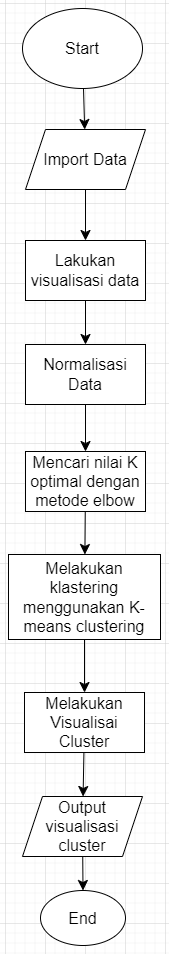

#Dataset : bike-sharing.csv

##**DESKRIPSI** **DATASET**

* instant: Nomor unik yang mengidentifikasi setiap baris data secara eksklusif.
* dteday: Tanggal peminjaman sepeda dalam format tahun-bulan-tanggal.
* season: Representasi musim saat peminjaman terjadi (1: musim semi, 2: musim panas, 3: musim gugur, 4: musim dingin).
* yr: Tahun peminjaman sepeda (0: 2011, 1: 2012).
* mnth: Bulan peminjaman sepeda (1 hingga 12).
* hr: Jam peminjaman sepeda (0 hingga 23).
* holiday: Indikator apakah hari tersebut merupakan hari libur (0: tidak libur, 1: libur).
* weekday: Hari dalam seminggu saat peminjaman terjadi (0 hingga 6, dengan 0 sebagai Minggu).
* workingday: Indikator apakah hari tersebut adalah hari kerja (0: tidak hari kerja, 1: hari kerja).
* weathersit: Kondisi cuaca saat peminjaman terjadi (1: cerah, 2: berkabut/berawan, 3: hujan ringan/salju, 4: hujan/salju intens).
* temp: Suhu dalam derajat Celsius saat peminjaman.
* atemp: Suhu bersamaan dalam derajat Celsius.
* hum: Kelembaban relatif saat peminjaman.
* windspeed: Kecepatan angin saat peminjaman.
* casual: Jumlah peminjam sepeda tanpa keanggotaan tetap.
* registered: Jumlah peminjam sepeda dengan keanggotaan tetap.
* cnt: Total peminjaman sepeda (casual + registered).




#**K-means clustering real-world example**

##data loading

In [40]:
 # Impor library Pandas dengan alias pd
import pandas as pd

# Baca file CSV ke dalam DataFrame dan beri nama df_bike
df_bike = pd.read_csv(("/content/bike-sharing.csv"), index_col="instant")

# Tampilkan lima baris pertama dari DataFrame
df_bike.head(5)

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Dilakukan pengimporan library pandas untuk melakukan manipulasi data. Kemudian fungsi read_csv digunakan untuk membaca format data csv yang berisi infornasi tentang peminjaman sepeda dan menyimpannya dalam DataFrame bernama df_bike. Indeks baris diatur menggunakan kolom " instant".

Untuk memeriksa data yang sudah dibaca, gunakan fungsi .head() untuk menampilkan data

##visualization

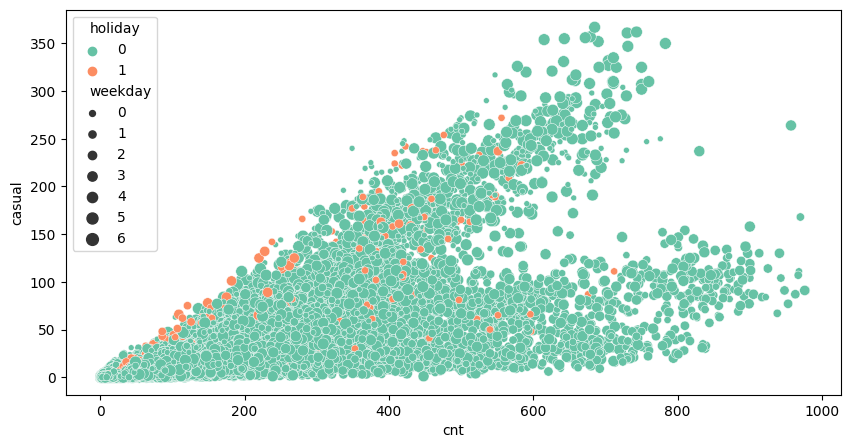

In [41]:
#import library untuk melakukan visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns

#membuat scatter plot
plt.figure(1, figsize = (10, 5))
sns.scatterplot(
    data = df_bike,
    x="cnt",
    y="casual",
    hue = "holiday",
    size="weekday",
    palette="Set2"
);

Dilakukan pengimportan library yaitu matplotlib.pyplot dan seaborn yang akan digunakan untuk melakukan visualisasi pada data. Selanjutnya membuat scatterplot dan diatur secara spesifik.

Plot tersebut menunjukkan hubungan antara dua variabel utama : jumlah total peminjaman sepeda("cnt") seebagai sumbu x dan jumlah peminjaman sepeda casual("casual") sebagai sumbu y. Di samping itu, informasi tambahan ditampilkan melalui atribut lainnya:

* Pengelompokan berdasarkan atribut "holiday" diwakili oleh perbedaab warna pada titik-titik scatter plot, sehingga memperlihatkan bagaimana pola peminjaman berbeda antara hari libur dan bukan hari libur.
* Penggunaan atribut "weekday" untuk mengatur ukuran titik-titik dalam plot memberikan dimensi tambahan, yang mana ukuran titik menunjukkan nilai dari kolom tersebut yang membantu dalam melihat apakah terdapat pola spesifik dalam peminjaman berdasarkan hari dalam seminggu.
* Palet warna "Set2" digunakan untuk memberikan variasi warna yang jealas, sehingga lebih mudah dalam memahami dan melakukan perbandingan antara kategori yang berbeda.

Visualisasi scatter plot memberikan gambaran mengenai jumlah total peminjaman sepeda berhubungan dengan jumlah peminjaman casual, dengan memperhatikan pengaruh hari libur, hari kerja, dan variabilitas harian dalam peminjaman sepeda.

##normalizing

melakukan normalisasi pada data dengan menghilangkan outlier, dengan menghapus kolom "dteday" dan "windspeed", kemudian akan digunakan kolom lainnya untuk melakukan clustering.

In [42]:
#import modul preprocessing dari scikit-learn
from sklearn import preprocessing

#menghapus kolom yang ditentukan
x = df_bike.drop(['dteday','windspeed'], axis=1)

#menormalisaikan data yang tersisa
x_norm = preprocessing.normalize(x)

##elbow method

Nilai K optimal pada algoritma K-means dapat dicari menggunakan metode elbow.

In [43]:
!pip3 install KMeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

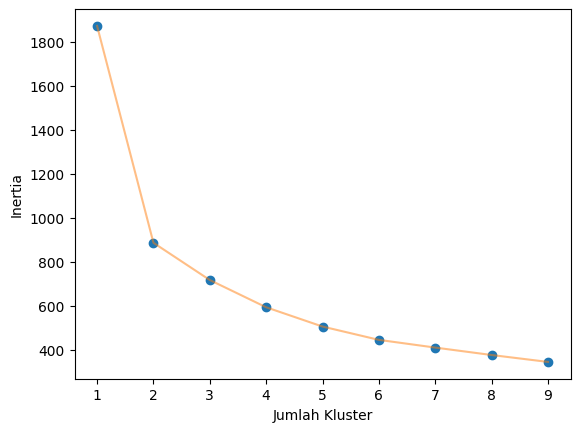

In [44]:
from sklearn.cluster import KMeans
import numpy as np


# Mendefinisikan fungsi elbow_plot dengan parameter data dan clusters
def elbow_plot(data, clusters):
    # Membuat daftar kosong untuk menyimpan nilai inertia
    inertia = []

    # Melakukan iterasi pada rentang nilai cluster dari 1 hingga clusters
    for n in range(1, clusters):
      algorithm = KMeans(
      n_clusters=n,
      init="k-means++",
      random_state=125,
      )

      # Melatih model pada data input
      algorithm.fit(data)

      # Menambahkan inertia (jumlah kuadrat dalam kluster) ke daftar inertia
      inertia.append(algorithm.inertia_)

    # Membuat plot elbow
    plt.plot(np.arange(1, clusters), inertia, "o")
    plt.plot(np.arange(1, clusters), inertia, "-", alpha=0.5)

    # Menetapkan label untuk sumbu x dan y
    plt.xlabel("Jumlah Kluster")
    plt.ylabel('Inertia')

    # Menampilkan plot
    plt.show()

# Memanggil fungsi elbow_plot dengan data input x_norm dan jumlah kluster diatur menjadi 10
elbow_plot(x_norm, 10)


Plot tersebut merupakan plot "elbow" dari normalisasi data yang telah dilakukan sebelumnya. Plot menunjukkan perubahan nilai inertia seiring dengan peningkatan jumlah cluster yang diuji.

##k-means clustering

In [45]:
#membuat model Kmeans dengan 3 Kluster
algorithm = KMeans(n_clusters = 3, init="k-means++", random_state=125)
#melatih model pada data yang telah dinormalisasi
algorithm.fit(x_norm)
#membuat label kluster untuk setiap sampel pada data
labels = algorithm.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


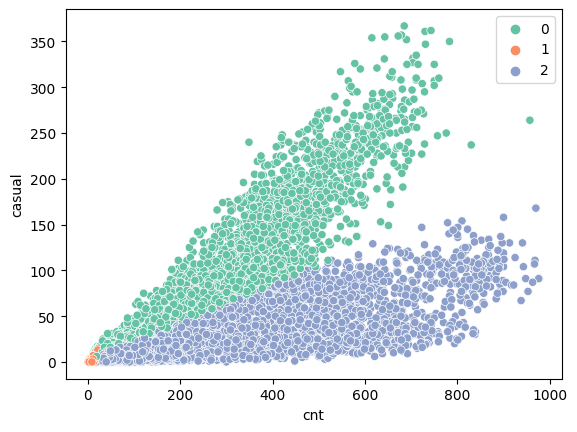

In [46]:
#membuat scatter plot dari data yang telah dikelompokkan
sns.scatterplot(data = x, x = "cnt", y="casual", hue = labels, palette="Set2");


Plot diatas merupakan visualisasi hasil klustering pada data yang telah dikelompokkan menggunakan K-means/ Plot bertujuan untuk memvisualisasikan hubungan antara jumlah total peminjaman sepeda("cnt") dan jumlah peminjaman sepeda casual("casual"), dengan penandaan warna yang menggambarkan kluster yang telah ditentukan sebelumnya.\

terdapat 3 clustering yang ditentukan yaitu :     
"0" untuk jumlah total peminjam sepeda rendah dan jumlah peminjam sepeda tanpa keanggotaan tetap tinggi.
"1" untuk jumlah total peminjam sepeda rendah dan jumlah peminjam sepeda tanpa keanggotaan tetap rendah. "2" untuk jumlah total peminjam sepeda tinggi dengan jumlah peminjam sepeda tanpa keanggotaan tetap rendah.

##using different features

In [47]:
#drop kolom "dtedat" dan "temp"
x = df_bike.drop(['dteday', 'temp'],axis=1)
#normalisasi data yang berbeda
x_norm = preprocessing.normalize(x)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

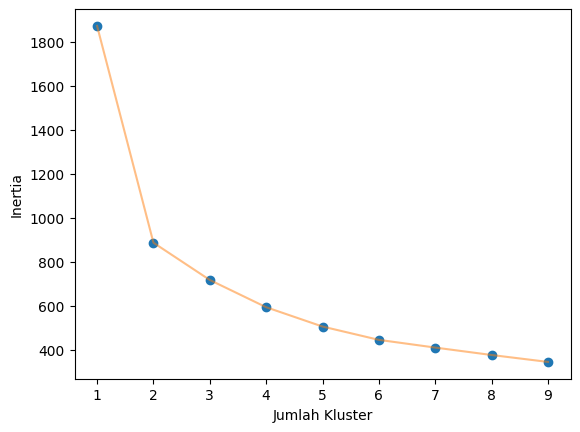

In [48]:
#menghitung jumlah cluster optimal dengan elbow plot hingga 10 kluster
elbow_plot(x_norm,10)

Melakukan perhitungan elbow plot, dengan menghapus kolom "dteday" dan "temp", kemudian dinormalisasikan data yang tersisa. Perhitungan kluster untuk mencari jumlah kluster optimal hingga 10 kluster. Elbow plot membantu dalam menentukan titik dimana penurunan inertia terjadi,untuk pemiilihan jumlah kluster yang optimal untuk analisis.

In [49]:
# Terapkan algoritma KMeans dengan 3 klaster pada set fitur baru yang dinormalisasi
algorithm = KMeans(n_clusters=3, init="k-means++", random_state=125)
algorithm.fit(x_norm)
# Dapatkan label klaster untuk setiap sampel data
labels = algorithm.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: xlabel='atemp', ylabel='registered'>

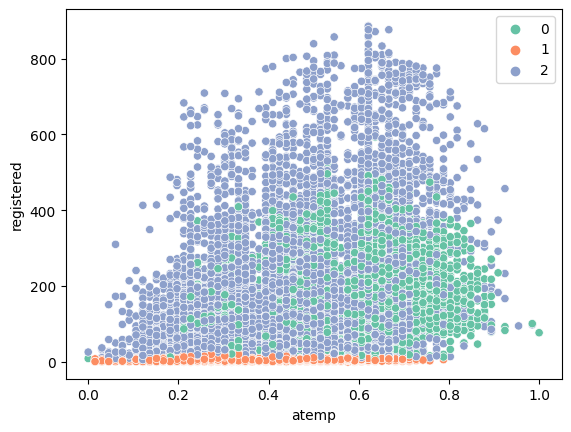

In [50]:
# Buat scatter plot dari data yang telah dikelompokkan menggunakan fitur yang berbeda
sns.scatterplot(data = x, x = "atemp", y = "registered", hue = labels, palette = "Set2")

Plot diatas membantu melihat pola dan perbedaan antar kelompok dalam data peminjaman sepeda setelah klustering. Tumpukan titik-titik sesuai warna pada scatter plot menunjukkan hasil klustering oleh K-means.

<Axes: ylabel='atemp'>

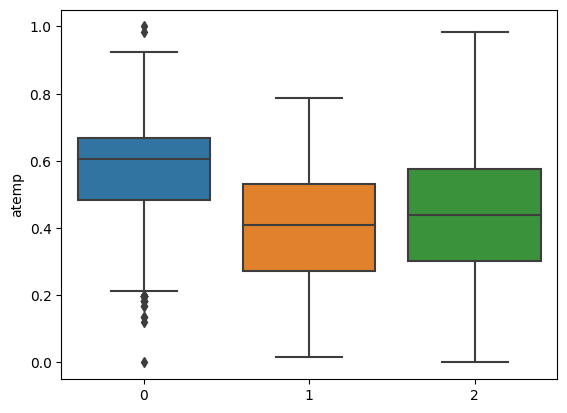

In [51]:
# Membuat box plot untuk masing-masing klaster terhadap variabel 'atemp'
sns.boxplot(x=labels, y=x['atemp'])

#Dataset : Instagram Visits Clustering.csv

#**Deskripsi Data**

Data yang saya gunakan adalah Instagram visits clustering.csv. Data ini terdiri dari tiga kolom, yaitu :
- User ID : Nomor identifikasi unik pada setiap pengguna instagram
- Instagram visit score : nilai yang menunjukan seberapa sering seseorang mengunjungi instagram
- Spending_rank(0 to 100) : Nilai atau peringkat dari 0 hingga 100 yang mungkin menunjukkan seberapa banyak pengguna tersebut menghabiskan uang atau melakukan pembelian di platform Instagram


#**K-means clustering real-world example**

##Data loading

In [52]:
#import library pandas
import pandas as pd
#membaca format file csv
df_insta = pd.read_csv(("/content/Instagram visits clustering.csv"), index_col="User ID")
#menampilkan 5 baris data teratas
df_insta.head(5)

,Instagram visit score,Spending_rank(0 to 100)
User ID,,
0,63,24.050708
1,61,25.223290
2,104,18.528245
3,82,86.890232
4,14,31.492397


Dilakukan pengimporan library pandas untuk melakukan manipulasi data. Kemudian fungsi read_csv digunakan untuk membaca format data csv dalam DataFrame bernama df_insta. Indeks baris diatur menggunakan kolom "User ID".

Untuk memeriksa data yang sudah dibaca, gunakan fungsi .head() untuk menampilkan data

##Visualization

<ipython-input-53-baf773117823>:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


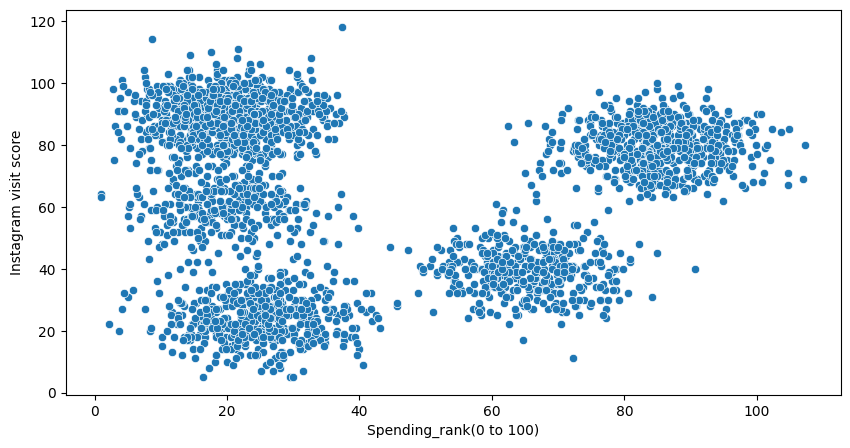

In [53]:
#import library untuk melakukan visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns

#membuat scatter plot
plt.figure(1, figsize = (10, 5))
sns.scatterplot(
    data = df_insta,
    x="Spending_rank(0 to 100)",
    y="Instagram visit score",
    palette="Set2"
);

Plot diatas menampilkan titik-titik yang mewakili pengguna instagram. Scatter plot menggambarkan hubungan variabel "Spending_rank(0 to 100)" untuk sumbu x dan sumbu  y adalah "instagram visit score".
Dapat dilihat plot peringkat pengeluaran dan tingkat seringnya mengunjungi intagram menyebar dan terlihat membentuk beberapa kelompok pada nilai uang yang dikeluarkan.

##normalizing

Lakukan normalisasi pada data untuk menghilangkan outliers

In [54]:
#import modul preprocessing dari scikit-learn
from sklearn import preprocessing

#x adalah data_insta
x = df_insta

#menormalisaikan data yang tersisa
x_norm = preprocessing.normalize(x)

##elbow method

melakukan pencarian nilai k optimal menggunakan metode elbow

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

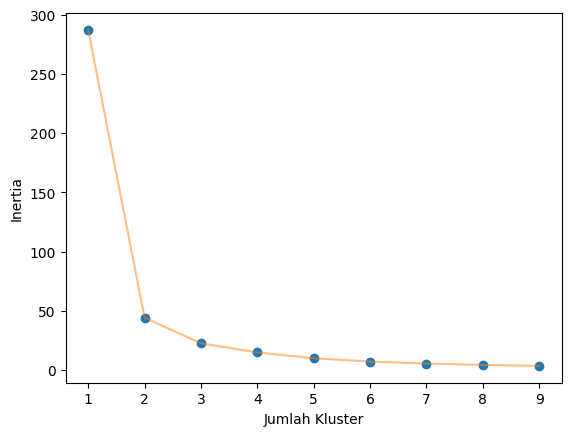

In [55]:
# Mendefinisikan fungsi elbow_plot dengan parameter data dan clusters
def elbow_plot(data, clusters):
    # Membuat daftar kosong untuk menyimpan nilai inertia
    inertia = []

    # Melakukan iterasi pada rentang nilai cluster dari 1 hingga clusters
    for n in range(1, clusters):
        # Membuat model KMeans dengan n kluster, inisialisasi k-means++, dan random state tetap
        algorithm = KMeans(
            n_clusters=n,
            init="k-means++",
            random_state=125,
        )

        # Melatih model pada data input
        algorithm.fit(data)

        # Menambahkan inertia (jumlah kuadrat dalam kluster) ke daftar inertia
        inertia.append(algorithm.inertia_)

    # Membuat plot elbow
    plt.plot(np.arange(1, clusters), inertia, "o")
    plt.plot(np.arange(1, clusters), inertia, "-", alpha=0.5)

    # Menetapkan label untuk sumbu x dan y
    plt.xlabel("Jumlah Kluster")
    plt.ylabel('Inertia')

    # Menampilkan plot
    plt.show()

# Memanggil fungsi elbow_plot dengan data input x_norm dan jumlah kluster diatur menjadi 10
elbow_plot(x_norm, 10)


##K-means clustering

In [56]:
#membuat model Kmeans dengan 3 Kluster
algorithm = KMeans(n_clusters = 3, init="k-means++", random_state=125)
#melatih model pada data yang telah dinormalisasi
algorithm.fit(x_norm)
#membuat label kluster untuk setiap sampel pada data
labels = algorithm.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


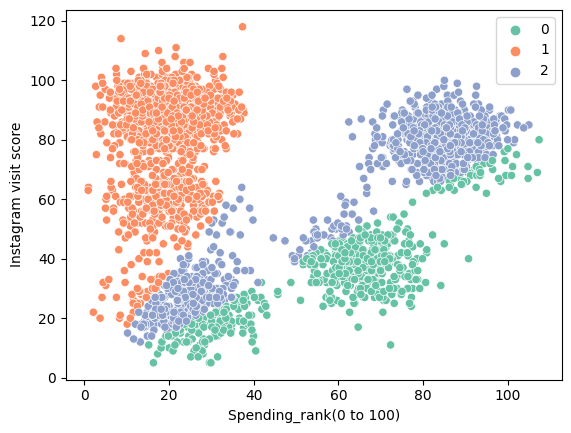

In [57]:
#membuat scatter plot dari data yang telah dikelompokkan
sns.scatterplot(data = x, x = "Spending_rank(0 to 100)", y="Instagram visit score", hue = labels, palette="Set2");


Plot diatas merupakan hasil clustering yang dilakukan pada data. Terdapat tiga clustering yang digunakan.
"0" untuk peringkat pengeluaran tinggi dan tingkat keseringan mengunjungi intagram rendah.
"1" untuk peringkat pengeluaran rendah dan tingkat keseringan mengunjungi instagram menengah hingga tinggi.

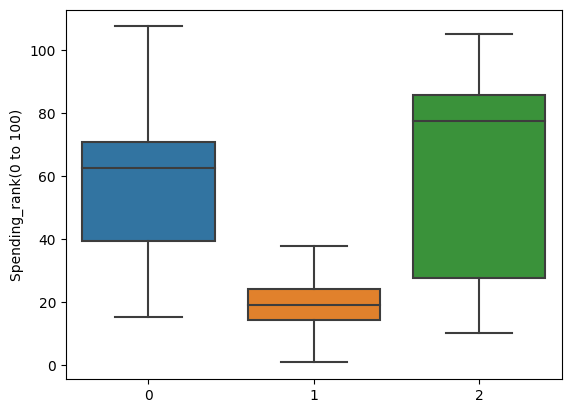

In [58]:
sns.boxplot(x = labels, y=x['Spending_rank(0 to 100)']);

#Dataset: clinfo.csv

#**Deskripsi Data**

##data loading

In [59]:
#import library pandas
import pandas as pd
#membaca format data csv memasukkannya dalam suatu variabel
df_clinfo = pd.read_csv(("/content/clinfo.csv"), encoding='ISO-8859-1', index_col="ID")
#menampilkan data teratas
df_clinfo.head(3)

,LEARNING CENTER,BRANCH SCHOOL,TUTOR,HEAD TEACHER,ONLINE,OFFLINE
ID,,,,,,
1,Accord School,Sheker'S IAS Study Circle,2,2,5,1
2,Akshra English Medium School,KARTHIK INSTITUTE OF POLICE COACHING,3,1,3,3
3,Narayana Junior College,CAREER LAUNCHER,2,3,3,2


##visualization

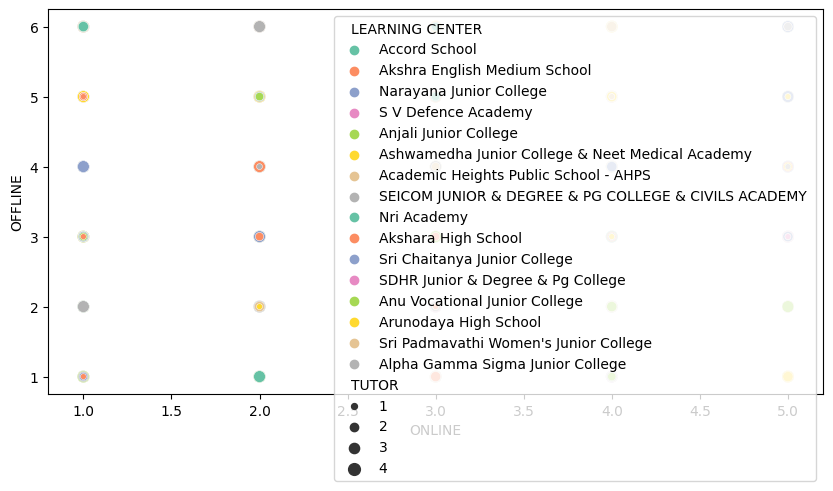

In [60]:
#import library untuk melakukan visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns

#membuat scatter plot
plt.figure(1, figsize = (10,5))
sns.scatterplot(
    data=df_clinfo,
    x="ONLINE",
    y="OFFLINE",
    hue="LEARNING CENTER",
    size="TUTOR",
    palette="Set2"
);

Scatter plot yang ditampilkan adalah titik-titik dimana setiap titik mewakili pembelajaran. Scatter plot menggambarkan hubungan variabel "ONLINE" yaitu jumlah siswa yang terdaftar online untuk sumbu x, dan pada sumbu y adalah "OFFLINE" yaitu jumlah siswa yang terdaftar offline. Pada plot terdapat variabel "LEARNING CENTER" yang membero warna bervariasi pada titik-titik scatter plot berdasarkan nama lembaga atau sekolah. Ukuran pada titik-titik scater plot juga bervariasi berdasarkan variabel "TUTOR" yaitu jumlah pengajar yang terlibat dalam proses pembelajaran.


##normalizing

Selanjutnya dilakukan normalisasi pada data

In [61]:
# Mengimpor pustaka yang diperlukan dari scikit-learn
from sklearn import preprocessing

# Membuat objek LabelEncoder
label_encoder = preprocessing.LabelEncoder()

# Menggunakan LabelEncoder untuk mengubah nilai dalam kolom 'LEARNING CENTER' menjadi nilai numerik
df_clinfo['LEARNING CENTER'] = label_encoder.fit_transform(df_clinfo['LEARNING CENTER'])

# Mengambil kolom 'BRANCH SCHOOL' dari dataframe df_clinfo
# dan menyimpannya dalam variabel X sebagai data input untuk model
x = df_clinfo.drop(["BRANCH SCHOOL"], axis=1)

# Normalisasi data menggunakan fungsi normalize dari scikit-learn
x_norm = preprocessing.normalize(x)


##metode elbow

Dilakukan pencarian nilai K optimal menggunakan metode elbow dengan memakai fungsi K-means untuk menemukan kluster

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

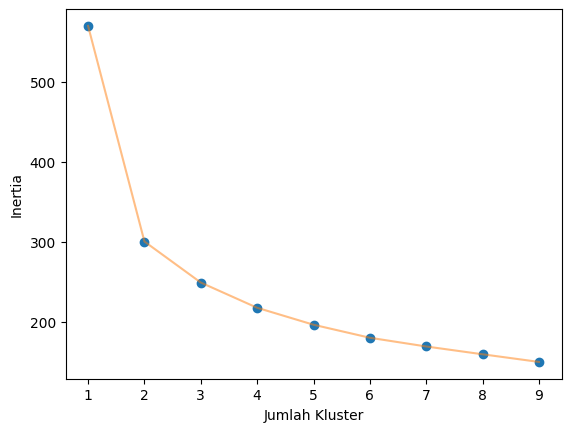

In [62]:
# Mendefinisikan fungsi elbow_plot dengan parameter data dan clusters
def elbow_plot(data, clusters):
    # Membuat daftar kosong untuk menyimpan nilai inertia
    inertia = []

    # Melakukan iterasi pada rentang nilai cluster dari 1 hingga clusters
    for n in range(1, clusters):
        # Membuat model KMeans dengan n kluster, inisialisasi k-means++, dan random state tetap
        algorithm = KMeans(
            n_clusters=n,
            init="k-means++",
            random_state=125,
        )

        # Melatih model pada data input
        algorithm.fit(data)

        # Menambahkan inertia (jumlah kuadrat dalam kluster) ke daftar inertia
        inertia.append(algorithm.inertia_)

    # Membuat plot elbow
    plt.plot(np.arange(1, clusters), inertia, "o")
    plt.plot(np.arange(1, clusters), inertia, "-", alpha=0.5)

    # Menetapkan label untuk sumbu x dan y
    plt.xlabel("Jumlah Kluster")
    plt.ylabel('Inertia')

    # Menampilkan plot
    plt.show()

# Memanggil fungsi elbow_plot dengan data input x_norm dan jumlah kluster diatur menjadi 10
elbow_plot(x_norm, 10)


##k-means clustering

In [63]:
#membuat model Kmeans dengan 3 Kluster
algorithm = KMeans(n_clusters = 3, init="k-means++", random_state=125)
#melatih model pada data yang telah dinormalisasi
algorithm.fit(x_norm)
#membuat label kluster untuk setiap sampel pada data
labels = algorithm.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


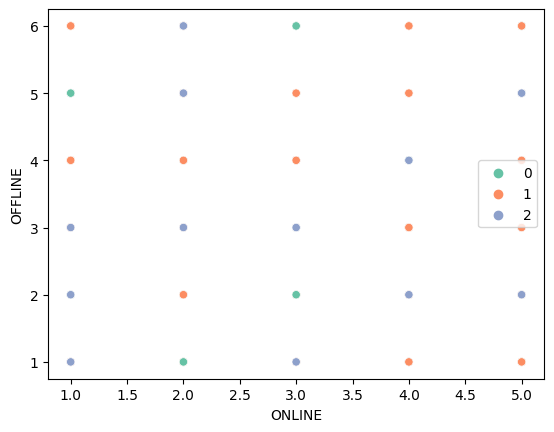

In [64]:
#membuat scatter plot dari data yang telah dikelompokkan
sns.scatterplot(data = x, x = "ONLINE", y="OFFLINE", hue = labels, palette="Set2");


Plot diatas adalah representasi cluster dua fitur yaitu "ONLINE" dan "OFFLINE"

##using different features

Disini kita akan melakukan clustering tetapi dengan menggunakan fitur yang berbeda, yaitu dengan menghapus kolom "BRANCH SCHOOL"

In [67]:
#hapus kolom yg ditentukan
x = df_clinfo.drop(["BRANCH SCHOOL"],axis=1)
#lakukan normalisasi pada data
x_norm = preprocessing.normalize(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

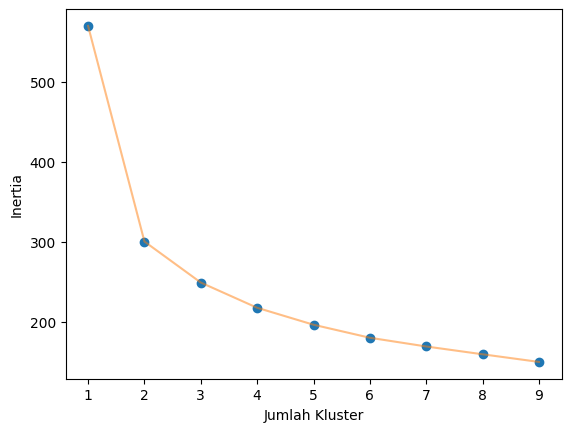

In [68]:
#menampilkan plot elbow
elbow_plot(x_norm,10)

In [72]:
from sklearn.cluster import KMeans

# Definisikan model K-Means dengan 3 klaster, inisialisasi "k-means++", dan seed acak 125
algorithm = KMeans(n_clusters=3, init="k-means++", random_state=125)

# Melatih model pada data yang sudah dinormalisasi
algorithm.fit(x_norm)

# Dapatkan label klaster untuk setiap baris
labels = algorithm.labels_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


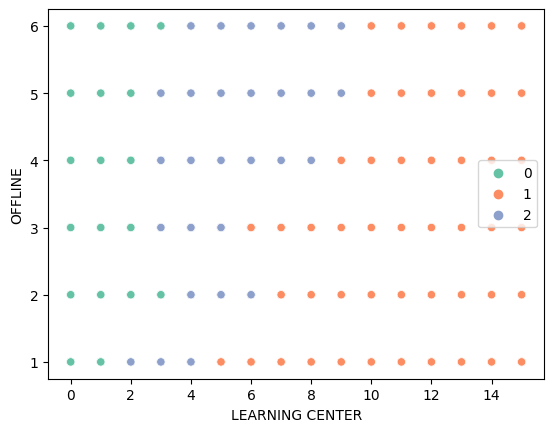

In [70]:
sns.scatterplot(data = x, x = 'LEARNING CENTER', y = 'OFFLINE', hue = labels, palette="Set2");

**Analisis**:
"0" untuk offline tinggi
"1" unutk learning center dan offline tinggi
"2" untuk offline tinggi dan learning center rendah hingga rata-rata

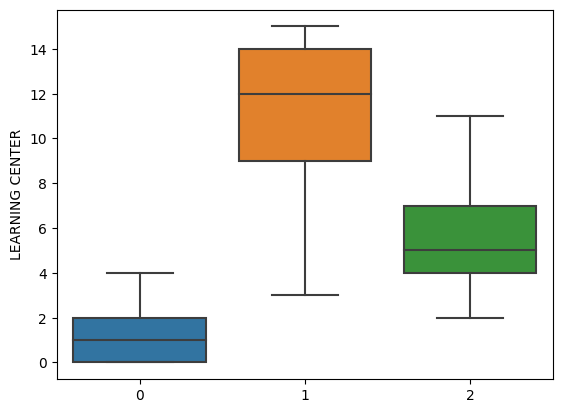

In [71]:
#menampilkan boxplot
sns.boxplot(x = labels, y = x['LEARNING CENTER']);